# Dataset Schema

## 1. User Data (user_data.csv)

| Column Name   | Data Type | Description                                           |
|---------------|-----------|-------------------------------------------------------|
| UserID        | string    | Unique identifier for the user.                      |
| FirstName     | string    | First name of the user.                              |
| LastName      | string    | Last name of the user.                               |
| Email         | string    | Email address of the user.                           |
| Gender        | string    | Gender of the user (e.g., Male, Female, Other).     |
| AgeGroup      | string    | Age group of the user (e.g., 18-25, 26-35).         |
| City          | string    | City of residence.                                   |
| Country       | string    | Country of residence.                                |
| DateOfBirth   | date      | Date of birth in YYYY-MM-DD format.                 |

---

## 2. Product Data (product_data.csv)

| Column Name     | Data Type | Description                                           |
|-----------------|-----------|-------------------------------------------------------|
| ProductID       | string    | Unique identifier for the product.                   |
| ProductName     | string    | Name of the product.                                 |
| Category        | string    | Product category (e.g., Electronics, Clothing).      |
| BasePrice       | float     | Base price of the product.                           |
| DiscountAmount   | float     | Discount on the product.                             |
| StockQuantity   | int       | Available stock quantity.                            |
| Description     | string    | Short description of the product.                    |

---

## 3. Transaction Data (transaction_data.csv)

| Column Name         | Data Type | Description                                           |
|---------------------|-----------|-------------------------------------------------------|
| TransactionID       | string    | Unique identifier for the transaction.               |
| UserID              | string    | Unique identifier for the user making the transaction.|
| ProductID           | string    | Unique identifier for the purchased product.         |
| TransactionAmount    | float     | Total transaction amount.                             |
| PaymentMethod       | string    | Payment method used (e.g., Credit Card, PayPal).    |
| PurchaseDate        | date      | Date of the transaction in YYYY-MM-DD format.       |
| DeliveryTime        | int       | Delivery time in days.                               |
| DiscountAmount      | float     | Discount applied during the transaction.             |

---

## 4. Interaction Data (interaction_data.csv)

| Column Name             | Data Type | Description                                           |
|-------------------------|-----------|-------------------------------------------------------|
| InteractionID           | string    | Unique identifier for the interaction.               |
| UserID                  | string    | Unique identifier for the interacting user.          |
| ProductID               | string    | Unique identifier for the interacted product.        |
| ViewedPages             | int       | Number of product pages viewed.                       |
| ProductViewHistory      | int       | Number of times the product was viewed historically.  |
| SearchQueries           | int       | Number of search queries related to the product.      |
| TimeSpentOnPages        | float     | Total time spent on product pages in minutes.        |
| WishlistItems           | int       | Number of times the product was added to the wishlist.|
| CartAddedItems          | int       | Number of times the product was added to the cart.    |
| CartAbandonedItems      | int       | Number of times the product was abandoned in the cart.|
| ReviewRating            | int       | Product rating given by the user (1-5), or null.     |
| ReviewText              | string    | Review text given by the user, if any.               |

## Import Libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder



## User Data Preprocessing

In [29]:
user_data = pd.read_csv('user_data.csv')
user_data.head()

,UserID,FirstName,LastName,Email,Gender,AgeGroup,City,Country,DateOfBirth
0,0a257610-2c9f-4212-999b-8a68488d93fb,Kristin,Phelps,anthony93@example.net,Other,18-25,Butlerton,Puerto Rico,1947-03-30
1,8fad3372-6d02-4263-929c-e94c822c6f10,Tiffany,Lowe,robert39@example.com,Female,26-35,East Zachary,French Polynesia,1987-04-30
2,313c6b2f-bc3e-467b-ae1f-e29eb68ce6a5,Brandon,Escobar,melissa13@example.org,Male,46-60,North Teresa,Cote d'Ivoire,1956-04-29
3,40c587b7-4fe5-4fe2-b89a-3c0cd492de8c,Dalton,Espinoza,ywilliams@example.org,Other,60+,New Carly,Mongolia,1946-05-12
4,05a698a7-5a3d-432e-ac6f-f962ee54d163,Gary,Monroe,alyssa31@example.net,Male,60+,Barbarashire,Uruguay,1955-11-01


In [30]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UserID       30000 non-null  object
 1   FirstName    30000 non-null  object
 2   LastName     30000 non-null  object
 3   Email        26989 non-null  object
 4   Gender       30000 non-null  object
 5   AgeGroup     30000 non-null  object
 6   City         30000 non-null  object
 7   Country      30000 non-null  object
 8   DateOfBirth  30000 non-null  object
dtypes: object(9)
memory usage: 2.1+ MB


In [31]:
user_data.isnull().sum()

UserID            0
FirstName         0
LastName          0
Email          3011
Gender            0
AgeGroup          0
City              0
Country           0
DateOfBirth       0
dtype: int64

In [32]:
user_data['Email'] = user_data['Email'].fillna('unknown@example.com')

In [34]:

from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical data
user_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
user_demographics = user_encoder.fit_transform(user_data[['Gender', 'AgeGroup', 'City', 'Country']])

# Combine one-hot encoded features with the Age feature
user_data['Age'] = pd.to_datetime('today').year - pd.to_datetime(user_data['DateOfBirth']).dt.year
user_features = np.hstack((user_demographics, user_data[['Age']].values))


In [38]:
user_data.drop(columns=['AgeGroup'], inplace=True)

In [39]:
user_data.head()

,UserID,FirstName,LastName,Email,Gender,City,Country,DateOfBirth,Age
0,0a257610-2c9f-4212-999b-8a68488d93fb,Kristin,Phelps,anthony93@example.net,Other,Butlerton,Puerto Rico,1947-03-30,77
1,8fad3372-6d02-4263-929c-e94c822c6f10,Tiffany,Lowe,robert39@example.com,Female,East Zachary,French Polynesia,1987-04-30,37
2,313c6b2f-bc3e-467b-ae1f-e29eb68ce6a5,Brandon,Escobar,melissa13@example.org,Male,North Teresa,Cote d'Ivoire,1956-04-29,68
3,40c587b7-4fe5-4fe2-b89a-3c0cd492de8c,Dalton,Espinoza,ywilliams@example.org,Other,New Carly,Mongolia,1946-05-12,78
4,05a698a7-5a3d-432e-ac6f-f962ee54d163,Gary,Monroe,alyssa31@example.net,Male,Barbarashire,Uruguay,1955-11-01,69


## Product data preprocessing

In [40]:
product_data  = pd.read_csv('product_data.csv')

In [41]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductID       350 non-null    object 
 1   ProductName     350 non-null    object 
 2   Category        350 non-null    object 
 3   BasePrice       330 non-null    float64
 4   DiscountAmount  330 non-null    float64
 5   StockQuantity   350 non-null    int64  
 6   Description     350 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 19.3+ KB


In [42]:
product_data.isnull().sum()

ProductID          0
ProductName        0
Category           0
BasePrice         20
DiscountAmount    20
StockQuantity      0
Description        0
dtype: int64

In [43]:
# Replace NaN values in BasePrice with the mean of the column
product_data['BasePrice'] = product_data['BasePrice'].fillna(product_data['BasePrice'].mean())

# Replace NaN values in DiscountAmount with the mean of the column
product_data['DiscountAmount'] = product_data['DiscountAmount'].fillna(product_data['DiscountAmount'].mean())

In [44]:
product_data.head()

,ProductID,ProductName,Category,BasePrice,DiscountAmount,StockQuantity,Description
0,1a6b586e-653b-4d7e-bed5-ff548bfdcb6f,Seamless maximized access,Home & Kitchen,254.940000,46.440,822,Everyone place air reason low well bag service...
1,e6221569-571e-4ed5-914c-aa70b3f54cb8,Streamlined client-server capability,Clothing,886.588473,144.165,904,Our again at reduce citizen quality must bar e...
2,cb898d87-eaf9-4604-966e-a5ec8d2c21f6,Managed zero tolerance conglomeration,Books,223.560000,22.190,479,Last may feel tend door conference simply diff...
3,800cbbdd-1af3-4cb6-b082-8b5176873768,Innovative logistical portal,Toys,975.550000,73.970,589,Technology not near that no garden table magaz...
4,eee6d8cd-8a78-4db8-b3d4-5085592a0147,Decentralized coherent firmware,Toys,840.510000,232.330,592,Watch sure discussion you commercial job wide ...


In [45]:
# Normalize numerical data
scaler = StandardScaler()
product_numerics = scaler.fit_transform(product_data[['BasePrice', 'DiscountAmount', 'StockQuantity']])

# One-hot encode the category
product_category = user_encoder.fit_transform(product_data[['Category']])

# Combine features
product_features = np.hstack((product_numerics, product_category))


## Transactional data Preprocessing

In [46]:
transaction_data  = pd.read_csv('transaction_data.csv')

In [47]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      30000 non-null  object 
 1   UserID             30000 non-null  object 
 2   ProductID          30000 non-null  object 
 3   TransactionAmount  27057 non-null  float64
 4   PaymentMethod      30000 non-null  object 
 5   PurchaseDate       30000 non-null  object 
 6   DeliveryTime       30000 non-null  int64  
 7   DiscountAmount     27057 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [48]:
transaction_data.isnull().sum() 

TransactionID           0
UserID                  0
ProductID               0
TransactionAmount    2943
PaymentMethod           0
PurchaseDate            0
DeliveryTime            0
DiscountAmount       2943
dtype: int64

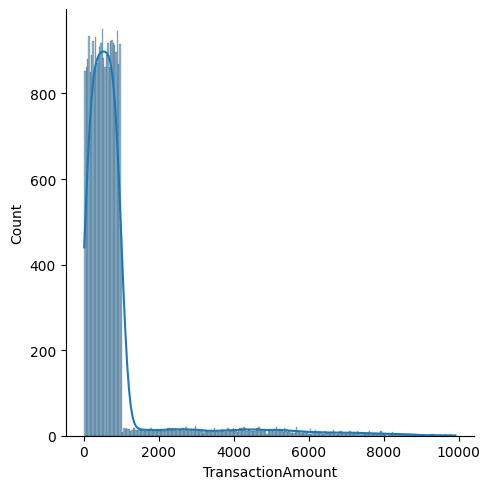

In [49]:
import seaborn as sns
sns.displot(transaction_data['TransactionAmount'], kde=True)

In [50]:
# Replace NaN values in BasePrice with the mean of the column
transaction_data['TransactionAmount'] = transaction_data['TransactionAmount'].fillna(transaction_data['TransactionAmount'].median())

# Replace NaN values in DiscountAmount with the mean of the column
transaction_data['DiscountAmount'] = transaction_data['DiscountAmount'].fillna(transaction_data['DiscountAmount'].mean())

In [51]:
# Convert PurchaseDate to datetime
transaction_data['PurchaseDate'] = pd.to_datetime(transaction_data['PurchaseDate'])

# Encode categorical variables
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
transaction_data['UserID'] = user_encoder.fit_transform(transaction_data['UserID'])
transaction_data['ProductID'] = product_encoder.fit_transform(transaction_data['ProductID'])



In [52]:
transaction_data.head()

,TransactionID,UserID,ProductID,TransactionAmount,PaymentMethod,PurchaseDate,DeliveryTime,DiscountAmount
0,064170d5-341e-4042-adbc-a25403bc9915,8825,38,768.58,PayPal,2023-02-02,11,375.560000
1,68cc6b05-0b09-4483-9ccc-2f0da558ad58,5744,3,154.72,Debit Card,2024-05-30,5,34.370000
2,ad058982-0b59-401d-b4e6-e6b44a83e39d,351,185,753.88,Debit Card,2023-09-01,11,4.110000
3,83371819-0358-4d86-960f-738c9c2a90d4,13406,302,998.53,PayPal,2023-02-22,2,460.140000
4,77e6e26f-f92d-487a-956c-6540a2c77a61,8987,320,556.35,Cash on Delivery,2024-07-22,11,210.084149


## Interaction Data Preprocessing

In [53]:
interaction_Data = pd.read_csv('interaction_data.csv')

In [54]:
interaction_Data.head()

,InteractionID,UserID,ProductID,ViewedPages,ProductViewHistory,SearchQueries,TimeSpentOnPages,WishlistItems,CartAddedItems,CartAbandonedItems,ReviewRating,ReviewText
0,5985f0f0-f9a4-40ef-87f0-e3b3a7dffe82,72b742ce-3ce7-43c2-b58a-551199f95be4,16ef3477-7f44-4d68-ad1e-7c92115a454c,10,16,5,NaN,3,7,7,5.0,Cover recently last note case what space.
1,24780e21-7064-4aac-8e98-0313ea1b0125,f6f48340-2cdd-4cb9-a057-f8a1615ed31c,2092caae-e5b8-41eb-b176-95d84b18fda0,9,83,5,NaN,5,1,3,2.0,While safe environmental over read religious w...
2,03e9ec62-c42a-4ed6-b160-95b12de5cdb7,2e09bd9a-4a07-486e-906d-ec7d88528792,df762f01-6f9f-4b10-a13b-f92e007613e9,7,100,19,53.46,8,10,10,NaN,Suffer Republican bed plan into nice have proj...
3,1080c35f-970e-4cc0-8a03-c9f2d906ff40,3ff99676-b021-4c6c-94cf-22d6d5668fad,07fc1417-cb66-4d36-bbb9-d80ba06b5833,14,75,3,97.77,6,3,2,4.0,Religious explain high mind answer to push dev...
4,890b219c-8ff7-4dc0-bf82-ad23e9a516f6,d5abe419-d24d-40e1-93dc-a086b327691d,6d3f920f-9b89-417c-9ee5-545a0195c2cb,18,11,4,24.69,3,0,10,3.0,NaN


In [55]:
interaction_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InteractionID       30000 non-null  object 
 1   UserID              30000 non-null  object 
 2   ProductID           30000 non-null  object 
 3   ViewedPages         30000 non-null  int64  
 4   ProductViewHistory  30000 non-null  int64  
 5   SearchQueries       30000 non-null  int64  
 6   TimeSpentOnPages    27074 non-null  float64
 7   WishlistItems       30000 non-null  int64  
 8   CartAddedItems      30000 non-null  int64  
 9   CartAbandonedItems  30000 non-null  int64  
 10  ReviewRating        24094 non-null  float64
 11  ReviewText          23931 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 2.7+ MB


In [56]:
interaction_Data.isnull().sum()

InteractionID            0
UserID                   0
ProductID                0
ViewedPages              0
ProductViewHistory       0
SearchQueries            0
TimeSpentOnPages      2926
WishlistItems            0
CartAddedItems           0
CartAbandonedItems       0
ReviewRating          5906
ReviewText            6069
dtype: int64

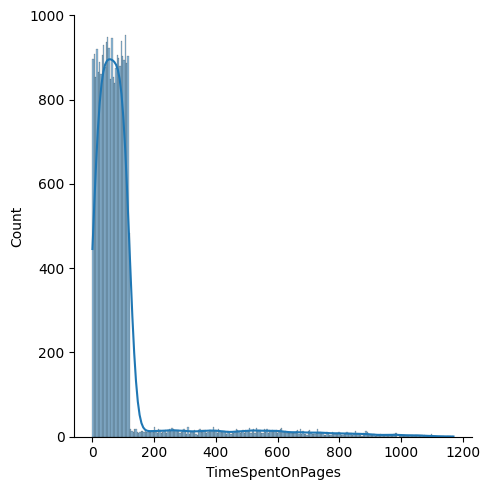

In [57]:
sns.displot(interaction_Data['TimeSpentOnPages'], kde=True)

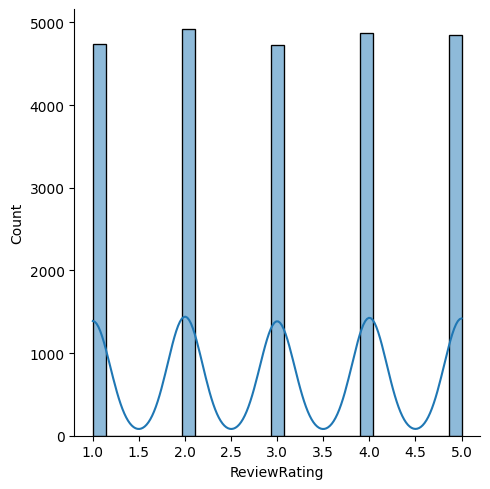

In [59]:
sns.displot(interaction_Data['ReviewRating'], kde=True)

In [60]:

# Replace NaN values in TimeSpentOnPages with the median of the column
interaction_Data['TimeSpentOnPages'] = interaction_Data['TimeSpentOnPages'].fillna(interaction_Data['TimeSpentOnPages'].median())

# Replace NaN values in ReviewRating with the mean of the column
interaction_Data['ReviewRating'] = interaction_Data['ReviewRating'].fillna(interaction_Data['ReviewRating'].mean())


In [61]:
interaction_Data['ReviewText'] = interaction_Data['ReviewText'].fillna('No review provided')